In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from mpl_toolkits.mplot3d import Axes3D

Let's say we have a 1D object with length L = 1 meter, and we want to simulate how its temperature changes over time as it cools down from an initial temperature T0 = 100°C to a final temperature Ts = 20°C.


We discretize the object into nx = 10 equally spaced points (or nodes) along the object, and we also divide the time into nt = 5 time steps. This means we have 10 points and 6 time levels, where the initial temperature is known at all the points, and we want to find the temperature at each point and time level.

In [185]:
# Parameters
T0 = 100  # initial temperature of object (degrees Celsius)
Ts = 0   # temperature of surroundings (degrees Celsius)
k = 0.1   # cooling coefficient

# Spatial parameters
L = 1     # length of object (m)
nx = 10   # number of spatial nodes
dx = L/nx # spatial step size

# Time parameters
t0 = 0    # start time
tf = 60   # end time
nt = 30  # number of time steps
dt = (tf-t0)/nt # time step

# Initialize temperature array
T = np.zeros((nx, nt+1))
T[:, 0] = T0

To solve this system numerically, we represent the temperature at each point and time level as an unknown variable. We can use a matrix equation to solve for all these unknowns.

The matrix equation has the form Ax = b, where A is a matrix that represents the spatial and temporal dependencies of the system, x is the vector of unknowns, and b is the vector of known temperatures at the previous time level.

In this case, A is a tridiagonal matrix that represents the discretized Laplacian operator (second-order derivative operator) that governs the heat diffusion in the object. The diagonal elements of A are all $ 1+2\cdot\alpha $ , where alpha is a constant that depends on the time and space step sizes, and the off-diagonal elements are all -alpha.

The value of alpha depends on both the time step and the spatial step size. 

To solve the system, we need to invert A and multiply it by b, which we can do using the numpy.linalg.solve function. This gives us the vector of unknown temperatures at the current time level, which we can use as b in the next time step, and repeat the process until we reach the final time level.

In [186]:
alpha = k*dt/(dx**2)

A = diags([-alpha, 1+2*alpha, -alpha], [-1, 0, 1], shape=(nx, nx)).toarray()


In [187]:
# Finite element method
alpha = k*dt/(dx**2)
alpha =1
A = diags([-alpha, 1+2*alpha, -alpha], [-1, 0, 1], shape=(nx, nx)).toarray()



for i in range(1, nt+1):
    b = T[:, i-1]
    b[0] -= alpha*Ts
    b[-1] -= alpha*Ts
    T[:, i] = np.linalg.solve(A, b)




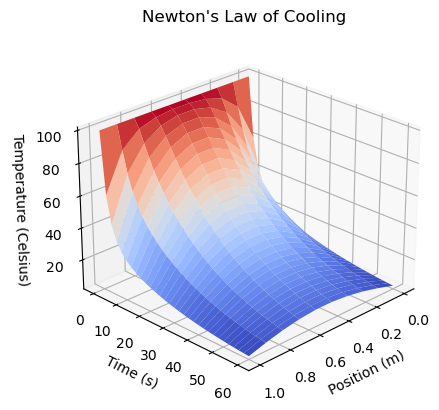

In [188]:
# Plot the results
t = np.linspace(t0, tf, nt+1)   #temporal part
x = np.linspace(0, L, nx)       #spatial part
X, T_T = np.meshgrid(x, t)      #creating regular grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T_T, T.T, cmap='coolwarm')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (Celsius)')
plt.title("Newton's Law of Cooling")
ax.view_init(elev=25, azim=45)
plt.show()

In [182]:
T

array([[100.        ,  61.79775281,  44.69132685,  35.68752669,
         30.21237638,  26.4693405 ,  23.67070537,  21.4352879 ,
         19.56311044,  17.94235185,  16.50713986,  15.21680707,
         14.04504122,  12.97394941,  11.99070729,  11.08562563,
         10.25101611,   9.48051665,   8.76868419,   8.11074464,
          7.50243595,   6.93990668,   6.41964791,   5.93844561,
          5.49334546,   5.0816257 ,   4.70077516,   4.34847476,
          4.02258154,   3.72111448,   3.44224186],
       [100.        ,  85.39325843,  72.27622775,  62.3712532 ,
         54.94960245,  49.19564511,  44.54277562,  40.63515832,
         37.25404343,  34.26394511,  31.57906772,  29.14328134,
         26.9183166 ,  24.876807  ,  22.99817247,  21.26616959,
         19.6674227 ,  18.19053384,  16.82553591,  15.56354972,
         14.39656322,  13.31728408,  12.31903706,  11.39568892,
         10.54159076,   9.75153164,   9.02069978,   8.34464913,
          7.71926985,   7.14076191,   6.6056111 ],
  

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Parameters
T0 = 100  # initial temperature of object (degrees Celsius)
Ts = 20   # temperature of surroundings (degrees Celsius)
k = 0.1   # cooling coefficient

# Spatial parameters
L = 1     # length of object (m)
nx = 100  # number of spatial nodes
dx = L/nx # spatial step size

# Time parameters
t0 = 0    # start time
tf = 60   # end time
nt = 30  # number of time steps
dt = (tf-t0)/nt # time step

# Initialize temperature array
T = np.zeros((nx, nt+1))
T[:, 0] = T0

# Compute coefficient matrix A using finite element method
alpha = k*dt/(dx**2)
A = diags([-alpha, 1+2*alpha, -alpha], [-1, 0, 1], shape=(nx, nx)).toarray()

# Apply boundary conditions to coefficient matrix
A[0, 0] = 1 + alpha
A[-1, -1] = 1 + alpha
A[0, 1] = -alpha
A[-1, -2] = -alpha

# Time loop
for i in range(1, nt+1):
    # Apply boundary conditions to temperature array
    T[0, i] = T0
    T[-1, i] = Ts
    # Solve for temperature at next time step using finite element method
    b = np.zeros(nx)
    for j in range(1, nx-1):
        b[j] = T[j, i-1]
    b[0] = T0 + alpha*Ts
    b[-1] = Ts + alpha*T[-2, i-1]
    T[:, i] = np.linalg.solve(A, b)

# Plot temperature distribution over time


In [155]:
T[0]

array([1.00000000e+02, 1.97186708e+03, 4.86778712e+04, 2.12695726e+06,
       9.52860519e+07, 4.27156471e+09, 1.91492446e+11, 8.58452891e+12,
       3.84840963e+14, 1.72522649e+16, 7.73412067e+17, 3.46717505e+19,
       1.55432057e+21, 6.96795633e+22, 3.12370667e+24, 1.40034508e+26,
       6.27769043e+27, 2.81426326e+29, 1.26162285e+31, 5.65580428e+32,
       2.53547421e+34, 1.13664285e+36, 5.09552396e+37, 2.28430281e+39,
       1.02404372e+41, 4.59074663e+42, 2.05801317e+44, 9.22598990e+45,
       4.13597400e+47, 1.85414044e+49, 8.31203668e+50])

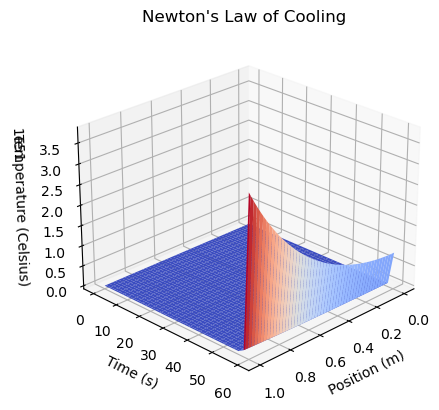

In [156]:
# Plot the results
t = np.linspace(t0, tf, nt+1)   #temporal part
x = np.linspace(0, L, nx)       #spatial part
X, T_T = np.meshgrid(x, t)      #creating regular grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T_T, T.T, cmap='coolwarm')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (Celsius)')
plt.title("Newton's Law of Cooling")
ax.view_init(elev=25, azim=45)
plt.show()

C:\Users\Didzis\AppData\Local\Temp\ipykernel_6528\2283309623.py:45: RuntimeWarning: invalid value encountered in double_scalars
  b[j] = alpha*(T[j-1, i-1] - 2*T[j, i-1] + T[j+1, i-1])


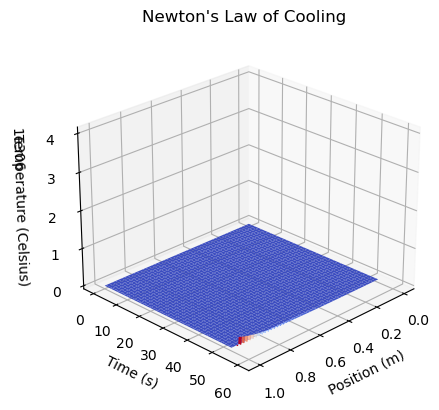

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Parameters
T0 = 100  # initial temperature of object (degrees Celsius)
Ts = 20   # temperature of surroundings (degrees Celsius)
k = 0.1   # cooling coefficient

# Spatial parameters
L = 1     # length of object (m)
nx = 100  # number of spatial nodes
dx = L/nx # spatial step size

# Time parameters
t0 = 0    # start time
tf = 60   # end time
nt = 300  # number of time steps
dt = (tf-t0)/nt # time step

# Initialize temperature array
T = np.zeros((nx, nt+1))
T[:, 0] = T0

# Compute coefficient matrix A using finite difference method
alpha = k*dt/(dx**2)
A = diags([-alpha, 1+2*alpha, -alpha], [-1, 0, 1], shape=(nx, nx)).toarray()

# Apply boundary conditions to coefficient matrix
A[0, 0] = 1 + alpha
A[-1, -1] = 1 + alpha
A[0, 1] = -alpha
A[-1, -2] = -alpha

# Time loop
for i in range(1, nt+1):
    # Apply boundary conditions to temperature array
    T[0, i] = T0
    T[-1, i] = Ts
    # Solve for temperature at next time step using finite element method
    b = np.zeros(nx)
    b[0] = T0 + alpha*Ts
    b[-1] = Ts + alpha*T[-2, i-1]
    for j in range(1, nx-1):
        b[j] = alpha*(T[j-1, i-1] - 2*T[j, i-1] + T[j+1, i-1])
    T[:, i] = np.linalg.solve(A, b)


# Plot the results
t = np.linspace(t0, tf, nt+1)   #temporal part
x = np.linspace(0, L, nx)       #spatial part
X, T_T = np.meshgrid(x, t)      #creating regular grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T_T, T.T, cmap='coolwarm')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (Celsius)')
plt.title("Newton's Law of Cooling")
ax.view_init(elev=25, azim=45)
plt.show()